# P1 SouthGermanCredit

Este cuaderno carga el dataset `SouthGermanCredit.asc` e importa NumPy, Pandas y Matplotlib.


In [536]:
# Imports
import sys
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

# Ajustes de display opcionales
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 120)

# Resolver ruta del dataset de forma robusta
CANDIDATES = [
    Path('/home/camilo-arch/machine-learning/introduccion/notebooks/data/SouthGermanCredit.asc'),
    Path('data/SouthGermanCredit.asc'),
    Path('introduccion/notebooks/data/SouthGermanCredit.asc'),
    Path('../notebooks/data/SouthGermanCredit.asc'),
]
DATA_PATH = next((p for p in CANDIDATES if p.exists()), None)
print("CWD:", Path().resolve())
print("Probando rutas:", [str(p) for p in CANDIDATES])
assert DATA_PATH is not None, (
    "No se encontró el archivo SouthGermanCredit.asc en ninguna de las rutas candidatas"
)
print(f"Usando dataset en: {DATA_PATH.resolve()}")


CWD: /app/notebooks
Probando rutas: ['/home/camilo-arch/machine-learning/introduccion/notebooks/data/SouthGermanCredit.asc', 'data/SouthGermanCredit.asc', 'introduccion/notebooks/data/SouthGermanCredit.asc', '../notebooks/data/SouthGermanCredit.asc']
Usando dataset en: /app/notebooks/data/SouthGermanCredit.asc


In [537]:
# Carga de datos
# El archivo es texto con separadores por espacios y una fila de encabezados
columns_preview = None
try:
    df = pd.read_csv(DATA_PATH, sep=r"\s+", engine="python")
    columns_preview = df.columns.tolist()
    print(f"Filas: {len(df):,} | Columnas: {df.shape[1]}")
    print("Columnas:", columns_preview)
except Exception as exc:
    print("Error al leer el archivo:", exc)

# Vista rápida
df.head()


Filas: 1,000 | Columnas: 21
Columnas: ['laufkont', 'laufzeit', 'moral', 'verw', 'hoehe', 'sparkont', 'beszeit', 'rate', 'famges', 'buerge', 'wohnzeit', 'verm', 'alter', 'weitkred', 'wohn', 'bishkred', 'beruf', 'pers', 'telef', 'gastarb', 'kredit']


,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,wohnzeit,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1,18,4,2,1049,1,2,4,2,1,4,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,2,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,4,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,2,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,4,2,38,1,2,2,2,2,1,1,1


In [538]:
# Traducción de nombres de columnas al inglés
column_map = {
    'laufkont': 'checking_account_status',
    'laufzeit': 'duration_in_months',
    'moral': 'credit_history',
    'verw': 'purpose',
    'hoehe': 'credit_amount',
    'sparkont': 'savings_account_bonds',
    'beszeit': 'employment_since',
    'rate': 'installment_rate',
    'famges': 'personal_status_sex',
    'buerge': 'other_debtors_guarantors',
    'wohnzeit': 'residence_since',
    'verm': 'property',
    'alter': 'age_in_years',
    'weitkred': 'other_installment_plans',
    'wohn': 'housing',
    'bishkred': 'existing_credits_count',
    'beruf': 'job',
    'pers': 'people_liable_maintenance',
    'telef': 'telephone',
    'gastarb': 'foreign_worker',
    'kredit': 'credit_risk',
}

missing = sorted(set(column_map) - set(df.columns))
if missing:
    print("Advertencia: columnas no encontradas en DataFrame:", missing)

# Renombrar
df = df.rename(columns=column_map)
print("Nuevos nombres de columnas:")
print(df.columns.tolist())

# Vista rápida con nombres traducidos
df.head()


Nuevos nombres de columnas:
['checking_account_status', 'duration_in_months', 'credit_history', 'purpose', 'credit_amount', 'savings_account_bonds', 'employment_since', 'installment_rate', 'personal_status_sex', 'other_debtors_guarantors', 'residence_since', 'property', 'age_in_years', 'other_installment_plans', 'housing', 'existing_credits_count', 'job', 'people_liable_maintenance', 'telephone', 'foreign_worker', 'credit_risk']


,checking_account_status,duration_in_months,credit_history,purpose,credit_amount,savings_account_bonds,employment_since,installment_rate,personal_status_sex,other_debtors_guarantors,residence_since,property,age_in_years,other_installment_plans,housing,existing_credits_count,job,people_liable_maintenance,telephone,foreign_worker,credit_risk
0,1,18,4,2,1049,1,2,4,2,1,4,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,2,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,4,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,2,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,4,2,38,1,2,2,2,2,1,1,1


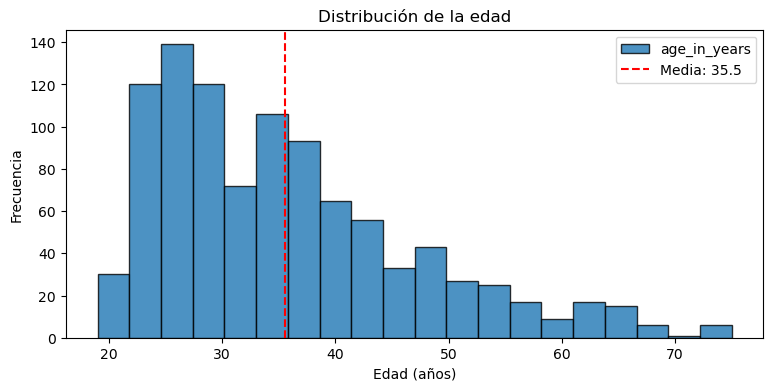

{'columna': 'age_in_years', 'min': 19.0, 'max': 75.0, 'mean': 35.542, 'count': 1000}


In [539]:
# Gráfico: distribución de la edad
# Soporta tanto 'age_in_years' (renombrado) como 'alter' (original)
age_col = 'age_in_years'
assert age_col is not None, "No se encuentra la columna de edad ('age_in_years' o 'alter'). Ejecuta las celdas previas."

plt.figure(figsize=(9, 4))
ax = df[age_col].plot(kind='hist', bins=20, edgecolor='black', alpha=0.8)
plt.title('Distribución de la edad')
plt.xlabel('Edad (años)')
plt.ylabel('Frecuencia')

# Métricas básicas
age_min = df[age_col].min()
age_max = df[age_col].max()
age_mean = df[age_col].mean()
plt.axvline(age_mean, color='red', linestyle='--', linewidth=1.5, label=f"Media: {age_mean:.1f}")
plt.legend()
plt.show()

print({
    'columna': age_col,
    'min': float(age_min),
    'max': float(age_max),
    'mean': float(age_mean),
    'count': int(df[age_col].count()),
})


In [540]:

# Split 50% train, 25% val, 25% test
RANDOM_STATE = 200

# 50% train
train_df = df.sample(frac=0.5, random_state=RANDOM_STATE)
rest_df = df.drop(train_df.index)


# repartir el 50% restante en dos mitades iguales
val_df = rest_df.sample(frac=0.5, random_state=RANDOM_STATE)
test_df = rest_df.drop(val_df.index)

X_mean = np.mean(train_df, axis=0)
X_std = np.std(train_df, axis=0)
X_norm = (train_df - X_mean) / X_std
X_norm

# verificación rápida
print(f"Total: {len(df)}")
print(f"Train: {len(train_df)} ({len(train_df)/len(df):.1%})")
print(f"Val:   {len(val_df)} ({len(val_df)/len(df):.1%})")
print(f"Test:  {len(test_df)} ({len(test_df)/len(df):.1%})")

Total: 1000
Train: 500 (50.0%)
Val:   250 (25.0%)
Test:  250 (25.0%)


In [541]:
# Definir columna objetivo (corrige 'age_in_tears' -> 'age_in_years' si aplica)
target_col = 'age_in_years' if 'age_in_years' in X_norm.columns else 'age_in_tears'

# Input: todas las columnas excepto la objetivo; Output: solo la objetivo
feature_cols = [c for c in X_norm.columns if c != target_col]

# --- Configuración de polinomización ---
# Llena POLY_COLUMNS con los nombres de columnas a expandir (normalizadas en X_norm)
POLY_COLUMNS = ['checking_account_status', 'people_liable_maintenance', 'purpose', 'purpose', 'job', 'duration_in_months']  # ejemplo: ['credit_amount', 'duration_in_months']
POLY_DEGREE = 3
POLY_INTERACTIONS = False  # True: incluye interacciones entre POLY_COLUMNS

# Construcción del input (base + polinomización opcional)
input_base = X_norm[feature_cols].values
feature_cols_aug = list(feature_cols)
parts = [input_base]

if POLY_COLUMNS:
    # Mapear nombres a índices en input_base
    idxs = [feature_cols.index(c) for c in POLY_COLUMNS]

    if POLY_INTERACTIONS:
        # Usar PolynomialFeatures en el subespacio seleccionado
        try:
            from sklearn.preprocessing import PolynomialFeatures
        except Exception as _:
            raise ImportError("Se requiere scikit-learn para interacciones polinómicas.")
        poly = PolynomialFeatures(degree=POLY_DEGREE, include_bias=False)
        Z = poly.fit_transform(input_base[:, idxs])
        # evitar duplicar columnas originales: remover primeras len(POLY_COLUMNS)
        Z_extra = Z[:, len(POLY_COLUMNS):]
        parts.append(Z_extra)
        new_names = poly.get_feature_names_out(input_features=POLY_COLUMNS).tolist()[len(POLY_COLUMNS):]
        feature_cols_aug += new_names
    else:
        # Solo potencias por columna (sin interacciones)
        new_names = []
        for col, j in zip(POLY_COLUMNS, idxs):
            z = input_base[:, j:j+1]
            for p in range(2, POLY_DEGREE + 1):
                parts.append(z ** p)
                new_names.append(f"{col}^{p}")
        feature_cols_aug += new_names

input = np.hstack(parts)
output = X_norm[target_col].values

# Matriz con bias en la primera columna
x_inflated = np.hstack((np.ones((input.shape[0], 1)), input))

# Nombres finales (con bias) para diagnósticos
feature_names = ['bias'] + feature_cols_aug

print({
    'target_col': target_col,
    'input_shape': tuple(input.shape),
    'num_features': int(input.shape[1]),
    'poly_columns': POLY_COLUMNS,
    'degree': POLY_DEGREE,
    'interactions': POLY_INTERACTIONS,
})


{'target_col': 'age_in_years', 'input_shape': (500, 32), 'num_features': 32, 'poly_columns': ['checking_account_status', 'people_liable_maintenance', 'purpose', 'purpose', 'job', 'duration_in_months'], 'degree': 3, 'interactions': False}


In [542]:
records = x_inflated.shape[0]
features = x_inflated.shape[1]
random.seed(42)
theta = np.random.rand(features,1)


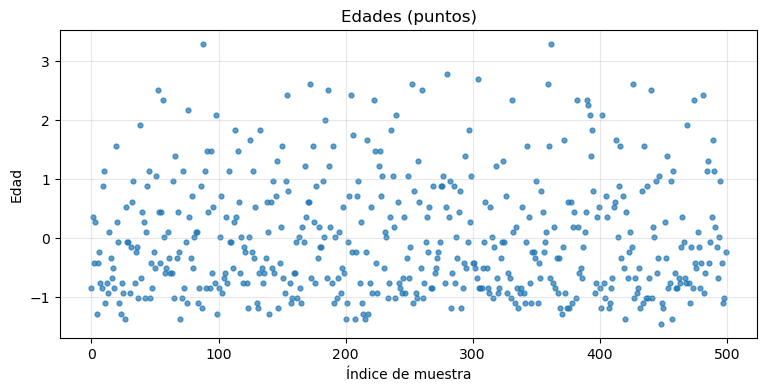

In [543]:
ages = np.ravel(output)

plt.figure(figsize=(9,4))
plt.scatter(np.arange(ages.size), ages, s=12, alpha=0.7)
plt.xlabel('Índice de muestra')
plt.ylabel('Edad')
plt.title('Edades (puntos)')
plt.grid(alpha=0.3)
plt.show()

In [544]:

def _resolve_theta_vector(theta):
    """Devuelve un vector 1-D de coeficientes a partir de theta en formas comunes.
    Acepta (d,), (d,1), (d,k) usando la última columna si hay histórico y (1,d) fila.
    """
    Theta = np.asarray(theta)
    if Theta.ndim == 2 and Theta.shape[0] == 1:   # fila -> vector
        return Theta.reshape(-1)
    if Theta.ndim == 2 and Theta.shape[1] > 1:
        return Theta[:, -1]
    if Theta.ndim == 2 and Theta.shape[1] == 1:
        return Theta[:, 0]
    if Theta.ndim == 1:
        return Theta
    raise ValueError(f"Forma inesperada de theta: {Theta.shape}")

def plot_regression_diagnostics(
    X=None,
    y_true=None,
    theta=None,
    y_est_history=None,
    feature_names=None,
    cost_history=None,
    title_prefix="Modelo",
    show_residuals=True,
    show_coefficients=True,
    figsize_main=(9, 4),
    # --- mejoras ---
    order="index",           # "index" | "y_true" | "y_pred"
    y_inv=None,              # callable para desnormalizar: y_inv(arr) -> arr
    drop_bias_in_coeffs=True,
    sort_coeffs="abs",       # None | "abs" | "value"
    report_metrics=True,     # imprime RMSE / R^2
):
    if y_true is None:
        raise ValueError("y_true es requerido")

    y_true = np.asarray(y_true).reshape(-1)
    n = y_true.size

    # 1) Obtener y_pred de forma robusta
    y_pred = None
    if y_est_history is not None and len(y_est_history) > 0:
        last_pred = np.asarray(y_est_history[-1])
        if last_pred.ndim == 2 and last_pred.shape[1] == 1:
            last_pred = last_pred[:, 0]
        elif last_pred.ndim > 1:
            last_pred = last_pred.reshape(-1)
        if last_pred.size == n:
            y_pred = last_pred

    if y_pred is None and (X is not None and theta is not None):
        theta_vec = _resolve_theta_vector(theta)
        X_arr = np.asarray(X)
        if X_arr.ndim != 2:
            raise ValueError(f"X debe ser 2-D, recibido {X_arr.shape}")
        if X_arr.shape[1] != theta_vec.shape[0]:
            raise ValueError(
                f"Incompatibilidad X.shape[1] ({X_arr.shape[1]}) vs theta ({theta_vec.shape[0]})"
            )
        y_pred = (X_arr @ theta_vec.reshape(-1, 1)).reshape(-1)

    if y_pred is None:
        raise ValueError("No se pudo determinar y_pred. Provee y_est_history o (X, theta).")
    if y_pred.size != n:
        raise ValueError(f"Dimensiones distintas: y_true={n}, y_pred={y_pred.size}")

    # 2) Desnormalizar si corresponde (misma función para ambas)
    if callable(y_inv):
        y_true_plot = np.asarray(y_inv(y_true))
        y_pred_plot = np.asarray(y_inv(y_pred))
    else:
        y_true_plot = y_true
        y_pred_plot = y_pred

    # 3) Orden para la serie (evita “dientes de sierra”)
    if order == "y_true":
        order_idx = np.argsort(y_true_plot)
    elif order == "y_pred":
        order_idx = np.argsort(y_pred_plot)
    else:
        order_idx = np.arange(n)

    idx = np.arange(n)

    # 4) Serie real vs predicha
    plt.figure(figsize=figsize_main)
    plt.scatter(idx, y_true_plot[order_idx], s=12, alpha=0.7, label="Real")
    plt.plot(idx, y_pred_plot[order_idx], lw=1.5, alpha=0.95, label="Predicho")
    plt.xlabel("Índice de muestra" + ("" if order=="index" else f" (ordenado por {order})"))
    plt.ylabel("Valor")
    plt.title(f"{title_prefix}: serie real vs predicha")
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

    # 7) Cost history (si lo que guardas es el mismo J que optimizas)
    if cost_history is not None:
        ch = np.asarray(cost_history).reshape(-1).astype(float)
        plt.figure(figsize=(7.5, 3.8))
        plt.plot(np.arange(ch.size), ch, lw=1.5)
        plt.xlabel("Iteración")
        plt.ylabel("Costo")
        plt.title(f"{title_prefix}: Evolución del costo")
        plt.grid(alpha=0.3)
        plt.tight_layout()
        plt.show()

    # 8) Coeficientes
    if show_coefficients and (theta is not None):
        theta_vec = _resolve_theta_vector(theta).astype(float)
        names = feature_names
        d = theta_vec.size

        # Nombres por defecto
        if names is None or len(names) != d:
            names = [f"feat_{i}" for i in range(d)]
            names[0] = "bias"

        # Opcional: quitar bias del gráfico
        if drop_bias_in_coeffs:
            coef_vals = theta_vec[1:]
            coef_names = names[1:]
        else:
            coef_vals = theta_vec
            coef_names = names

        # Ordenar barras para legibilidad
        if sort_coeffs == "abs":
            order_c = np.argsort(-np.abs(coef_vals))
        elif sort_coeffs == "value":
            order_c = np.argsort(coef_vals)
        else:
            order_c = np.arange(coef_vals.size)

        coef_vals = coef_vals[order_c]
        coef_names = [coef_names[i] for i in order_c]

        plt.figure(figsize=(max(10, 0.6 * len(coef_vals)), 4))
        plt.bar(coef_names, coef_vals)
        plt.axhline(0, lw=1)
        plt.xticks(rotation=60, ha="right")
        plt.ylabel("Valor de theta")
        plt.title(f"{title_prefix}: Coeficientes" + (" (sin bias)" if drop_bias_in_coeffs else ""))
        plt.tight_layout()
        plt.show()

    # 9) Métricas (opcional)
    if report_metrics:
        resid_raw = y_pred_plot - y_true_plot
        rmse = float(np.sqrt(np.mean(resid_raw * resid_raw)))
        ybar = float(np.mean(y_true_plot))
        ss_tot = float(np.sum((y_true_plot - ybar) ** 2))
        ss_res = float(np.sum(resid_raw ** 2))
        r2 = 1.0 - (ss_res / ss_tot if ss_tot != 0 else np.nan)
        print(f"[{title_prefix}] RMSE={rmse:.4f} | R^2={r2:.4f}")


In [545]:
def cost_function(x, y, theta, reg=None, lam=0.0):
    """
    J(θ) = (1/(2n)) * ||Xθ - y||^2  +  (λ/(2m)) * ||θ_{1:}||^2   [L2]
    J(θ) = (1/(2n)) * ||Xθ - y||^2  +  (λ/m)   * ||θ_{1:}||_1    [L1]
    """
    n = x.shape[0]
    m = x.shape[1]

    # Predicción y residuales
    y_est = x.dot(theta)                # (n,1)
    resid = y_est - y                   # (n,1)

    # MSE/2n
    mse_half = float((resid * resid).sum()) / (2.0 * n)

    # Regularización (excluye sesgo)
    reg_term = 0.0
    if theta.ndim == 2:
        w = theta[1:, 0]
    else:
        w = theta[1:]

    if reg == 'l2':
        reg_term = (lam / (2.0 * m)) * float((w * w).sum())
    elif reg == 'l1':
        reg_term = (lam / m) * float(np.abs(w).sum())

    return mse_half + reg_term
    

In [546]:
def fit_model(x, y, theta, alpha=0.02, reg=None, lam=0.0, steps=100):
    """
    Descenso de gradiente de J(θ) definido arriba.
    ∇J = (1/n) X^T (Xθ - y)  +  (λ/n)*[0, θ_{1:}]   (L2)
    ∇J = (1/n) X^T (Xθ - y)  +  (λ/n)*[0, sign(θ_{1:})] (L1)
    """
    n = x.shape[0]
    cost_history = []

    for _ in range(steps):
        # Predicción y residuo
        y_est = x.dot(theta)                 # (n,1)
        resid = y_est - y                    # (n,1)

        # Gradiente base (MSE/2n)
        grad = x.T.dot(resid) / n            # (d+1,1)

        # Regularización en el gradiente (sin sesgo)
        reg_vec = np.zeros_like(theta)
        if reg == 'l2':
            reg_vec[1:] = theta[1:]
            grad = grad + (lam / n) * reg_vec

        elif reg == 'l1':
            w = theta[1:]
            s = np.zeros_like(w)
            s[w > 0] =  1.0
            s[w < 0] = -1.0
            reg_vec[1:] = s
            grad = grad + (lam / n) * reg_vec

        # Paso de actualización
        theta = theta - alpha * grad

        # Registrar costo (mismo J que estás optimizando)
        cost = cost_function(x, y, theta, reg=reg, lam=lam)
        cost_history.append(cost)

    return cost_history, theta

In [547]:
alpha = 0.0005
lam = 0.2

In [548]:
# y como columna
y_col = output.reshape(-1, 1)
cost_history_l2, theta_l2 = fit_model(
    x_inflated,   # (n,d) con columna de unos en x_inflated[:,0]
    output,        # (n,1)
    theta,        # (d,1)
    alpha=alpha,
    reg='l2',     # o 'l1' / None
    lam=lam,
    steps=1000
)


In [549]:
# y como columna
cost_history_none, theta_none = fit_model(
    x_inflated,   # (n,d) con columna de unos en x_inflated[:,0]
    output,        # (n,1)
    theta,        # (d,1)
    alpha=alpha,
    reg=None,     # o 'l1' / None
    lam=0.0,
    steps=1000
)


In [550]:
# y como columna
cost_history_l1, theta_l1 = fit_model(
    x_inflated,   # (n,d) con columna de unos en x_inflated[:,0]
    output,        # (n,1)
    theta,        # (d,1)
    alpha=alpha,
    reg='l1',     # o 'l1' / None
    lam=lam,
    steps=1000
)


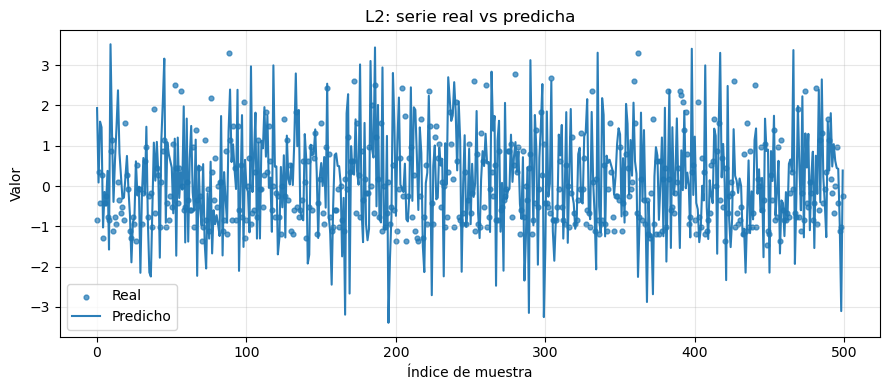

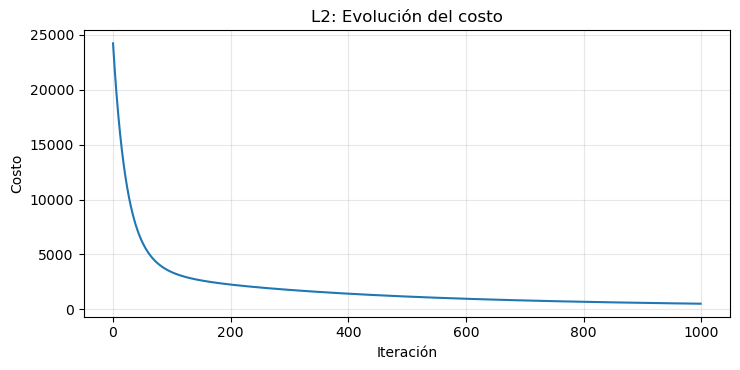

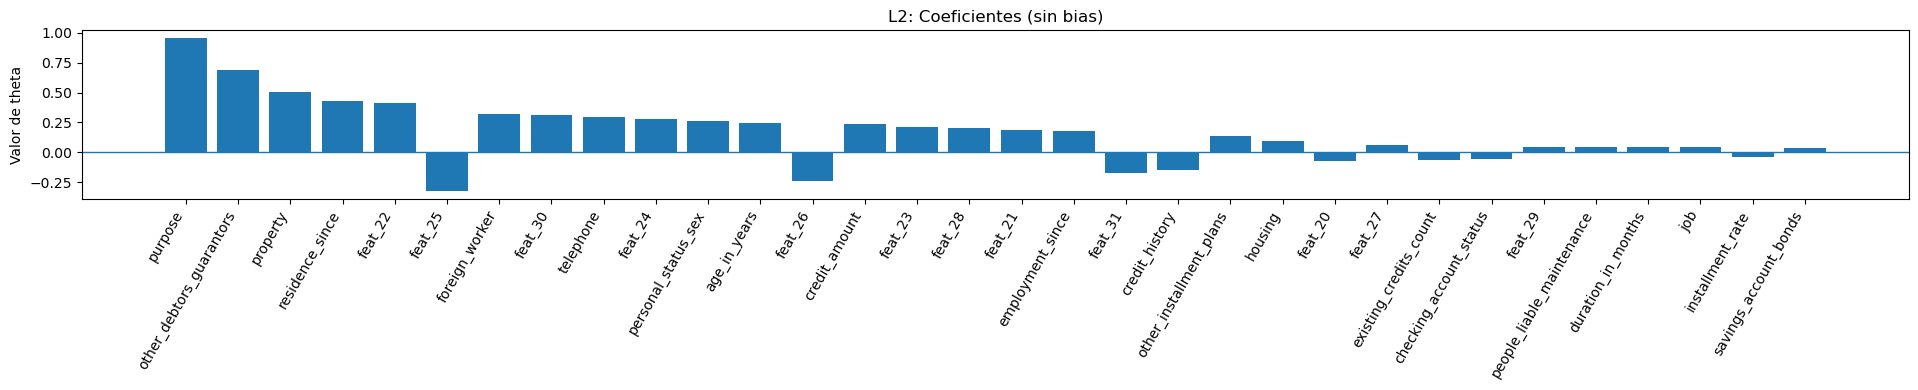

[L2] RMSE=1.4675 | R^2=-1.1536


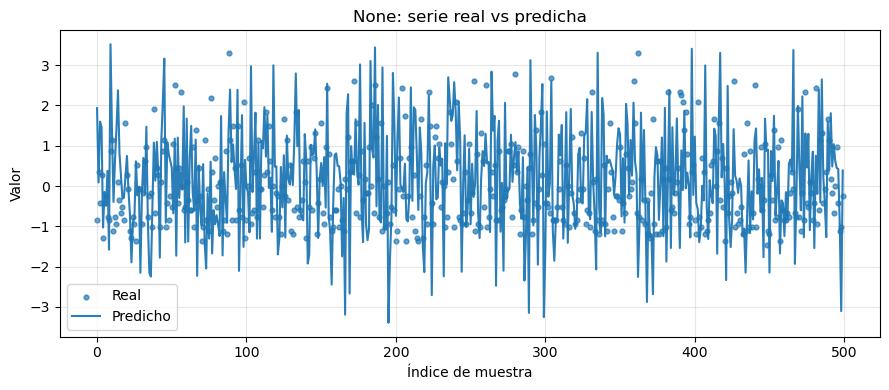

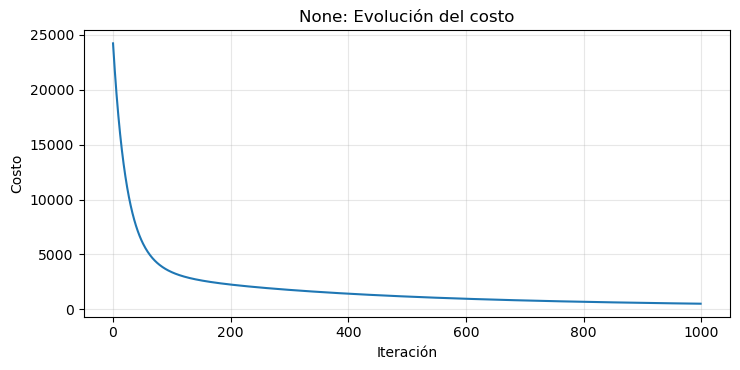

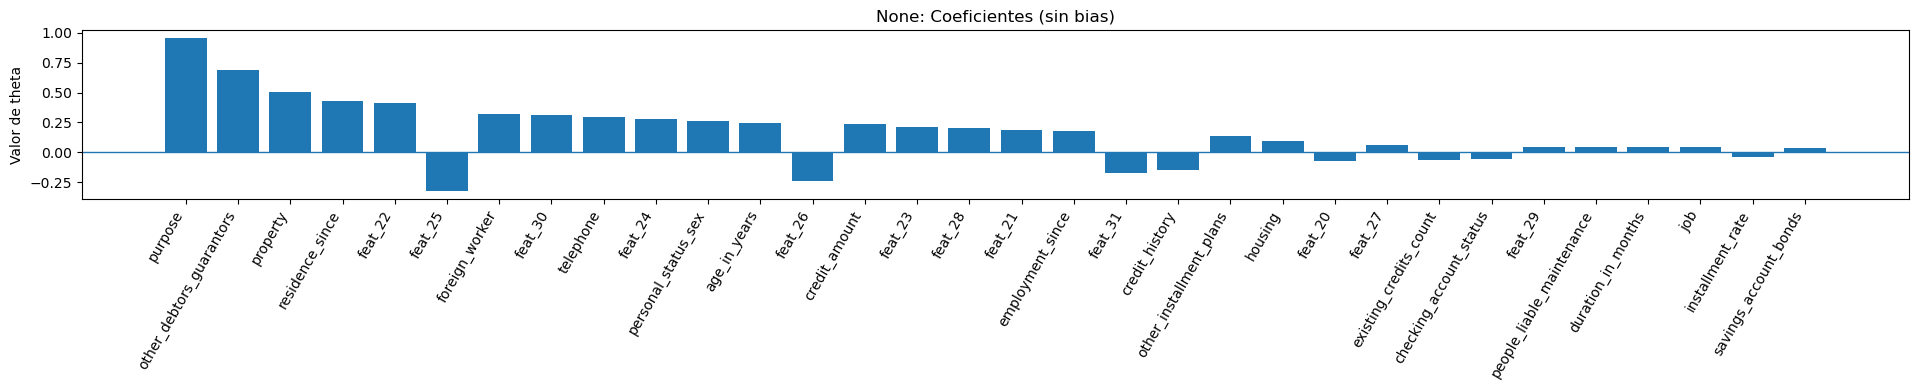

[None] RMSE=1.4677 | R^2=-1.1542


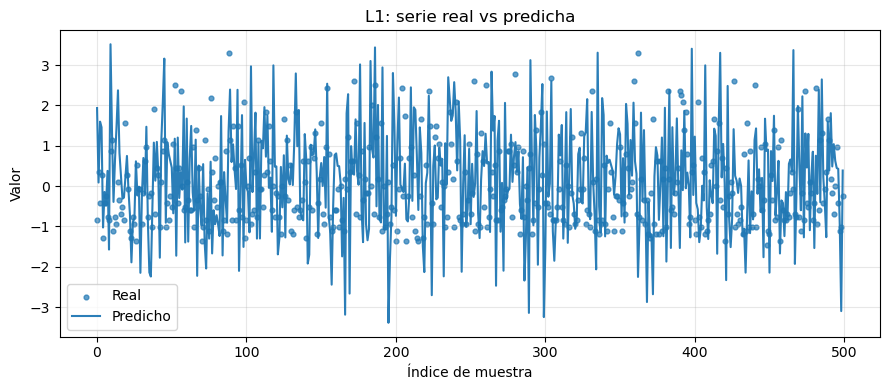

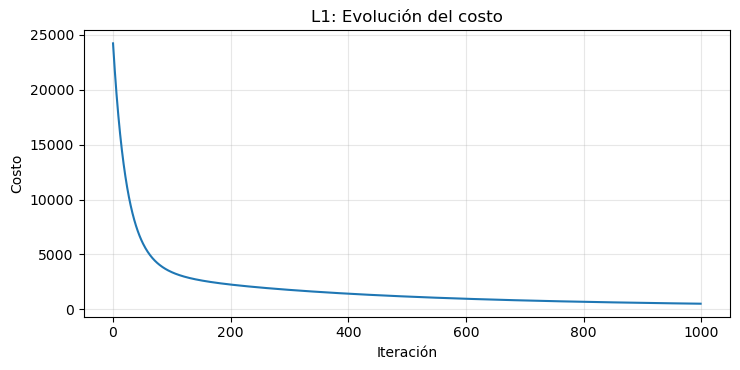

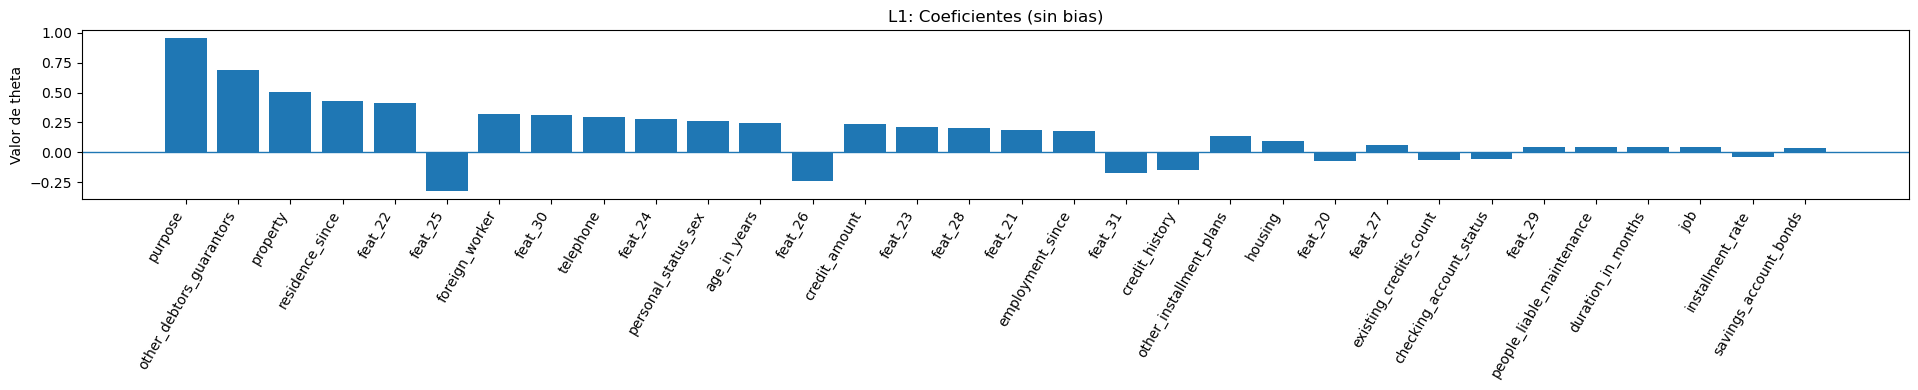

[L1] RMSE=1.4673 | R^2=-1.1530


In [551]:
X = x_inflated
need = X.shape[1] - 1  # sin bias

base_names = [
    'checking_account_status','duration_in_months','credit_history','purpose','credit_amount',
    'savings_account_bonds','employment_since','installment_rate','personal_status_sex',
    'other_debtors_guarantors','residence_since','property','age_in_years','other_installment_plans',
    'housing','existing_credits_count','job','people_liable_maintenance','telephone','foreign_worker'
]
base_names = [c for c in base_names if c != 'credit_risk'][:need]
if len(base_names) < need:
    base_names += [f'feat_{i}' for i in range(len(base_names), need)]

feature_names = ['bias'] + base_names

plot_regression_diagnostics(
    X=X,
    y_true=output,
    theta=theta_l2,
    y_est_history=None,
    feature_names=feature_names,
    cost_history=cost_history_l2,
    title_prefix="L2"
)
plot_regression_diagnostics(
    X=X,
    y_true=output,
    theta=theta_none,
    y_est_history=None,
    feature_names=feature_names,
    cost_history=cost_history_none,
    title_prefix="None"
)   
plot_regression_diagnostics(
    X=X,
    y_true=output,
    theta=theta_l1,
    y_est_history=None,
    feature_names=feature_names,
    cost_history=cost_history_l1,
    title_prefix="L1"
)